# KNN

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# importiamo Pandas e il dataframe dal file data/wine.csv
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/car.data', names=['buying','maint','doors','persons','lug_boot','safety','class values'])

In [ ]:
df

,buying,maint,doors,persons,lug_boot,safety,class values
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [ ]:
buy = {'vhigh': 0,'high': 1,'med': 2,'low': 3}
df.buying = [buy[item] for item in df.buying] #sostuiamo i valori in buying

In [ ]:
buy = {'vhigh': 0,'high': 1,'med': 2,'low': 3}
df.maint = [buy[item] for item in df.maint]

In [ ]:
boot = {'small': 0,'med': 1,'big': 2}
df.lug_boot	 = [boot[item] for item in df.lug_boot]

In [ ]:
safe = {'low': 0,'med': 1,'high': 2}
df.safety	 = [safe[item] for item in df.safety]

In [ ]:
cvalues = {'unacc': 0,'acc': 1,'good': 2,'vgood': 3}
df['class values'] = [cvalues[item] for item in df['class values']] #sostuiamo i valori in buying

In [ ]:
door = {'2': 2,'3': 3,'4': 4,'5more': 5}
df.doors = [door[item] for item in df.doors] #sostuiamo i valori in buying

In [ ]:
p = {'2': 2,'4': 4,'more': 5}
df.persons	 = [p[item] for item in df.persons]

In [ ]:
import numpy as np
df = df.to_numpy()
x=df[:,0:-1] # prendiamo tutti i dati tranne l'ultima colonna -> variabili indipendenti, osservazioni
y=df[:,-1] # prendiamo solo l'ultima colonna -> variabile dipendente, target

import collections
collections.Counter(y)

Counter({0: 1210, 1: 384, 3: 65, 2: 69})

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size =0.33, #by default is 75%-25%
                                                    #shuffle is set True by default,
                                                    stratify=y,
                                                    random_state= 123) #fix random seed for replicability

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((1157, 6), (1157,), (571, 6), (571,))

In [ ]:
# suppress scientific notation
np.set_printoptions(suppress=True)
print(x[:10])
print(f'y = {y[:10]}')

[[0 0 2 2 0 0]
 [0 0 2 2 0 1]
 [0 0 2 2 0 2]
 [0 0 2 2 1 0]
 [0 0 2 2 1 1]
 [0 0 2 2 1 2]
 [0 0 2 2 2 0]
 [0 0 2 2 2 1]
 [0 0 2 2 2 2]
 [0 0 2 4 0 0]]
y = [0 0 0 0 0 0 0 0 0 0]


In [ ]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
# https://scikit-learn.org/stable/ libreria per il Machine Learning in Python

# come per altri metodi di ML, dobbiamo prendere i nostri valori delle osservazioni e splittarle in due insiemi:
# training set: è il sottoinsieme delle osservazioni che serve al nostro metodo per imparare
# test set: è il sottoinsieme delle osservazioni che serve al nostro metodo per capire se ha imparato bene

from sklearn.model_selection import train_test_split # suddivide le osservazioni nei due insiemi

X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.33, # by default is 75%-25%
                                                    # shuffle is set True by default,
                                                    stratify = y, # per mantenere le proporzioni che ci sono nei dati di partenza
                                                    random_state = 123) # fix random seed for replicability

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((1157, 6), (1157,), (571, 6), (571,))

In [ ]:
print(X_train[:10])
print(f'y_train = {y_train[:10]}')

[[3 0 2 2 0 2]
 [1 2 3 2 2 0]
 [3 3 2 5 2 0]
 [0 2 4 5 0 1]
 [3 1 4 2 0 0]
 [0 2 5 5 0 2]
 [2 0 4 5 1 0]
 [3 1 5 5 0 1]
 [1 1 5 5 0 0]
 [0 1 4 5 0 0]]
y_train = [0 0 0 0 0 1 0 1 0 0]


In [ ]:
# importiamo il metodo che vogliamo utilizzara (tra i tanti disponibili...)
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3) # impostiamo l'unico parametro (il numero di vicini)

# prima parte: dobbiamo fare in modo che il metodo impari dalle informazioni a disposizione
# NB: notare che il metodo utilizza sia X_train che y_train, perché deve capire se sta predicendo correttamente
neigh.fit(X_train, y_train) # "alleniamo" il metodo con i dati del training set

# seconda parte: vediamo se il metodo ha imparato bene facendogli prevedere i risultati 
# NB: notare che c'è solo X perché le y devono essere previste dal metodo
predict = neigh.predict(X_test) # proviamo a fare una previsione sui dati del test set

# visualizziamo il risultato (solo i primi dieci pazienti)
print(f'dati predetti dal metodo =                {predict[:10]}') # dati predetti dal metodo
print(f'dati reali presenti nel dataset di test = {y_test[:10]}') # dati effettivi presenti nel test set

dati predetti dal metodo =                [0 0 0 0 0 3 0 1 1 0]
dati reali presenti nel dataset di test = [0 0 0 0 0 3 0 1 1 0]


In [ ]:
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


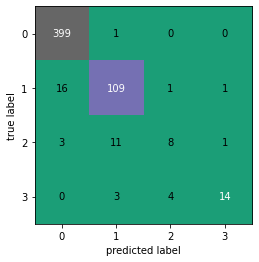

In [ ]:
#plots IMPORTS
from mlxtend.plotting import plot_confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

plot_confusion_matrix(confusion_matrix(y_test, predict), cmap=plt.cm.Dark2)
plt.show()

In [ ]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       400
           1       0.88      0.86      0.87       127
           2       0.62      0.35      0.44        23
           3       0.88      0.67      0.76        21

    accuracy                           0.93       571
   macro avg       0.83      0.72      0.76       571
weighted avg       0.92      0.93      0.92       571



# dTree

In [ ]:
# importiamo Pandas e il dataframe dal file data/wine.csv
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/car.data', names=['buying','maint','doors','persons','lug_boot','safety','class values'])

In [ ]:
buy = {'vhigh': 0,'high': 1,'med': 2,'low': 3}
df.buying = [buy[item] for item in df.buying] #sostuiamo i valori in buying

In [ ]:
buy = {'vhigh': 0,'high': 1,'med': 2,'low': 3}
df.maint = [buy[item] for item in df.maint]

In [ ]:
boot = {'small': 0,'med': 1,'big': 2}
df.lug_boot	 = [boot[item] for item in df.lug_boot]

In [ ]:
safe = {'low': 0,'med': 1,'high': 2}
df.safety	 = [safe[item] for item in df.safety]

In [ ]:
cvalues = {'unacc': 0,'acc': 1,'good': 2,'vgood': 3}
df['class values'] = [cvalues[item] for item in df['class values']] #sostuiamo i valori in buying

In [ ]:
door = {'2': 2,'3': 3,'4': 4,'5more': 5}
df.doors = [door[item] for item in df.doors] #sostuiamo i valori in buying

In [ ]:
p = {'2': 2,'4': 4,'more': 5}
df.persons	 = [p[item] for item in df.persons]

In [ ]:
dfnp = df.to_numpy()
x=df.drop(['class values'], axis=1).to_numpy() # prendiamo tutti i dati tranne l'ultima colonna -> variabili indipendenti, osservazioni
y=df.to_numpy()[:,-1] # prendiamo solo l'ultima colonna -> variabile dipendente, target

In [ ]:
df = df.drop(['class values'], axis=1)

In [ ]:
df

,buying,maint,doors,persons,lug_boot,safety
0,0,0,2,2,0,0
1,0,0,2,2,0,1
2,0,0,2,2,0,2
3,0,0,2,2,1,0
4,0,0,2,2,1,1
...,...,...,...,...,...,...
1723,3,3,5,5,1,1
1724,3,3,5,5,1,2
1725,3,3,5,5,2,0
1726,3,3,5,5,2,1


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size =0.33, #by default is 75%-25%
                                                    #shuffle is set True by default,
                                                    stratify=y,
                                                    random_state= 123) #fix random seed for replicability

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((1157, 6), (1157,), (571, 6), (571,))

In [ ]:
# importiamo il metodo che vogliamo utilizzara (tra i tanti disponibili...)
from sklearn import tree

# impostiamo i parametri del metodo
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
tree_clf = tree.DecisionTreeClassifier(criterion="gini", # criteri per stabilire come splittare
                                       max_depth=4, # profondità dell'albero per evitare l'overfitting
                                       min_samples_split=50, # dimensione minima del sottogruppo a cui fermarsi (no more split)
                                       max_leaf_nodes=6, # numero dei nodi foglia
                                       min_samples_leaf=4 # numero di campioni per essere una foglia
                                      )

# prima parte: dobbiamo fare in modo che il metodo impari dalle informazioni a disposizione
tree_clf.fit(X_train,y_train)

# seconda parte: vediamo se il metodo ha imparato bene facendogli prevedere i risultati 
predict = tree_clf.predict(X_test)

# visualizziamo il risultato (solo i primi dieci pazienti)
print(f'dati predetti dal metodo =                {predict[:10]}') # dati predetti dal metodo
print(f'dati reali presenti nel dataset di test = {y_test[:10]}') # dati effettivi presenti nel test set

dati predetti dal metodo =                [0 0 0 0 0 2 0 1 2 0]
dati reali presenti nel dataset di test = [0 0 0 0 0 3 0 1 1 0]


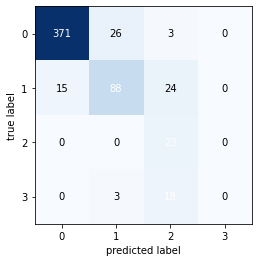

In [ ]:
#plots IMPORTS
from mlxtend.plotting import plot_confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

plot_confusion_matrix(confusion_matrix(y_test, predict))
plt.show()

In [ ]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       400
           1       0.75      0.69      0.72       127
           2       0.34      1.00      0.51        23
           3       0.00      0.00      0.00        21

    accuracy                           0.84       571
   macro avg       0.51      0.66      0.54       571
weighted avg       0.85      0.84      0.84       571



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


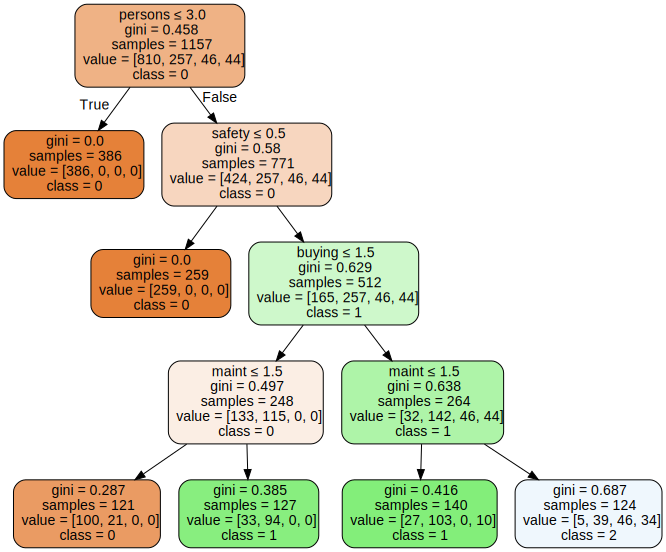

In [ ]:
#save the feature list into a vector (sono i nomi delle colonne del dataset)
features=list(df.columns.values)

import graphviz
dot_data = tree.export_graphviz(tree_clf, out_file=None, 
                     feature_names=features[0:6],  
                     class_names=['0','1','2','3'],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
graph.render('diabetes')
graph

In [ ]:
from sklearn.metrics import accuracy_score

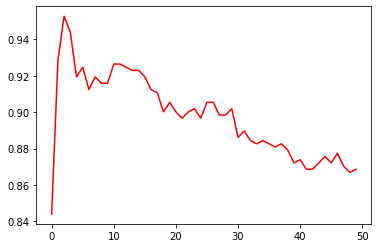

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
lista = []
for k in range(1,100,2):
  neigh = KNeighborsClassifier(n_neighbors=k) 
  neigh.fit(X_train, y_train) 
  predict = neigh.predict(X_test)
  a = accuracy_score(y_test, predict)
  lista.append(a)


plt.plot(lista, color = 'r')
plt.show()